In [38]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
#machine learning
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
# machine learning
from sklearn.naive_bayes import MultinomialNB,GaussianNB
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
df = pd.read_csv(r"../twitter_data.csv")

In [40]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis

In [41]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 80

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24252\1001935813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette=palette)


Text(0.5, 1.0, 'Disaster or not Disaster tweets')

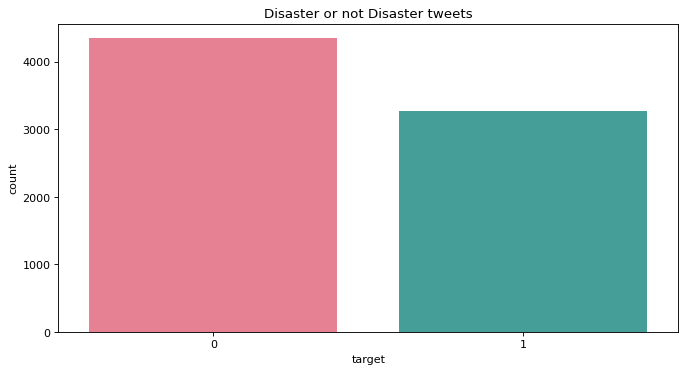

In [42]:
palette = sns.color_palette("husl", 2)
sns.countplot(x='target',data=df,palette=palette)
plt.title('Disaster or not Disaster tweets')

In [43]:
# craeteing new column for storing length of reviews 
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


<Axes: ylabel='Frequency'>

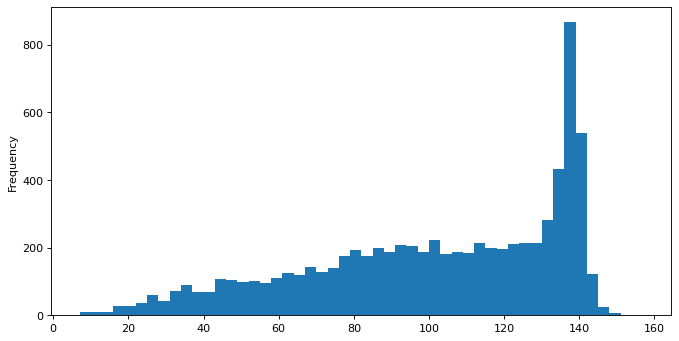

In [44]:
df['length'].plot(bins=50, kind='hist')

In [45]:
df.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [46]:
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

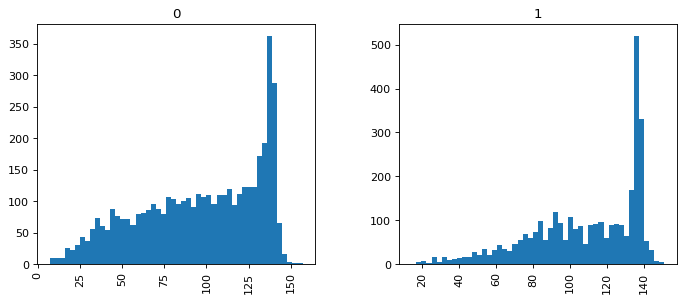

In [47]:
df.hist(column='length', by='target', bins=50,figsize=(10,4))

In [48]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1 = df[df['target']==1]
df_0 = df[df['target']==0]
df_1.loc[:,'text']=df_1['text'].apply(remove_stopwords)
df_0.loc[:,'text']=df_0['text'].apply(remove_stopwords)

# Plotting wordcloud of Disaster Tweets¶

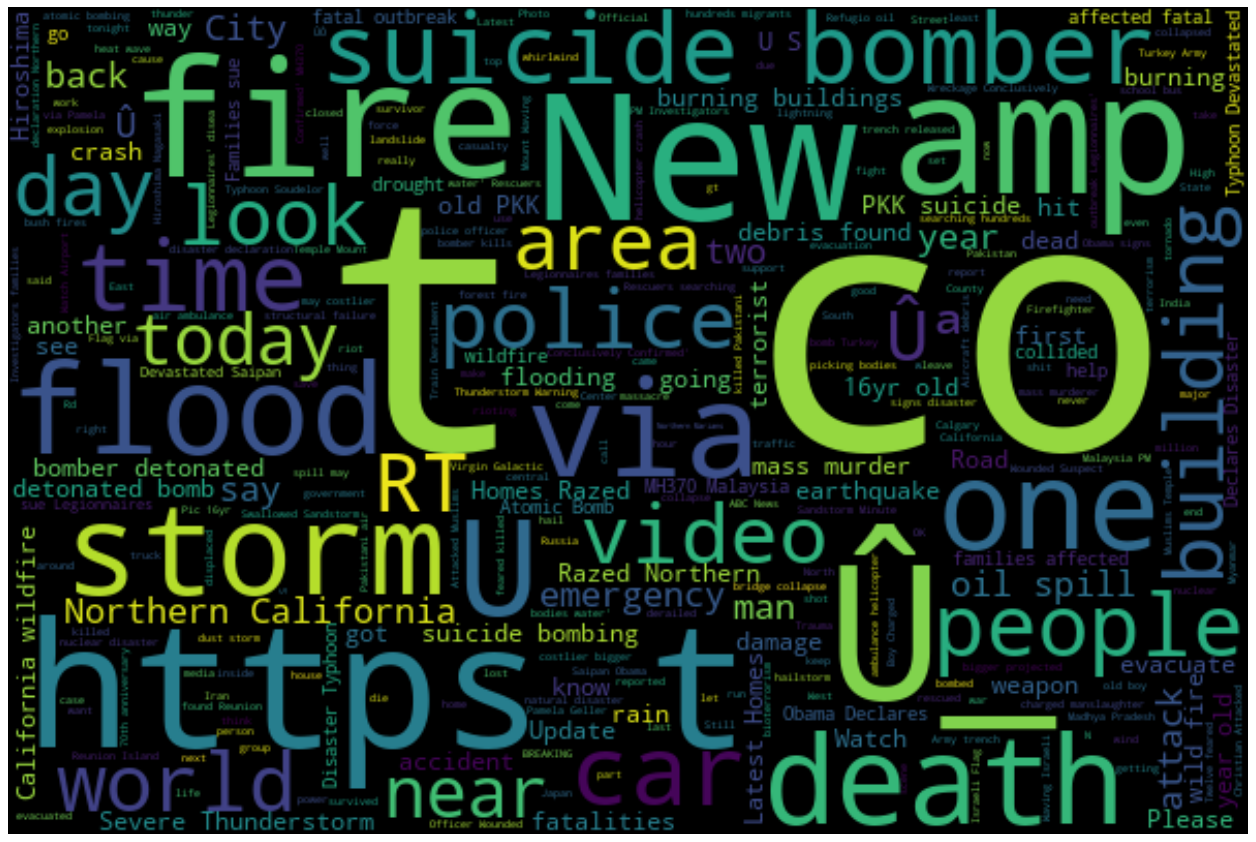

In [49]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 600 , height = 400).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Plotting wordcloud of Normal Tweets

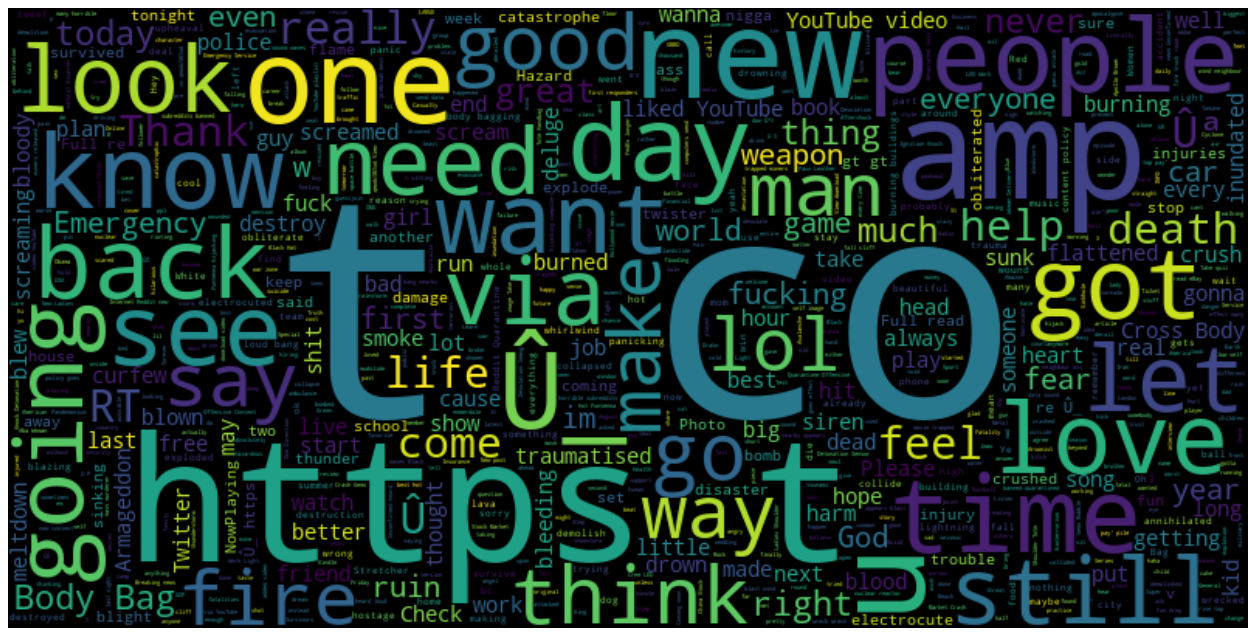

In [50]:
plt.figure(figsize = (20,20)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 800 , height = 400).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Data Cleaning and Preparation

In [51]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanTweet(txt):
  # lowercaing
    txt = txt.lower()
    # tokenization
    words = nltk.word_tokenize(txt)
  # removing stopwords & mennatizing the words
    words = ' '.join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text = "".join(words)
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',text)
    return txt  

# Applying Clean Tweet Function on Tweets Text¶

In [52]:
df['cleaned_tweets'] = df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


# Creating Feature & Target Variables¶

In [53]:
y = df.target
X=df.cleaned_tweets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

# TF-IDF Vectorizer - Bi-Gram

In [55]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)


# Multinomial Naive Bayes

In [56]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)

MultinomialNB()

# 10-Fold Cross Validation

In [57]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_mnb2.mean()

0.7922824302134648

# Model Prediction Test set

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.7338


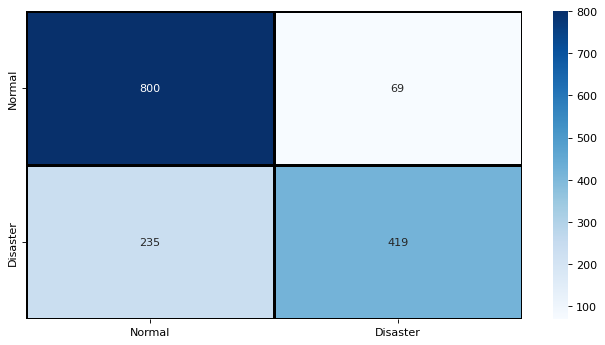

In [58]:
pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, pred_mnb2)

prec = precision_score(y_test, pred_mnb2)
rec = recall_score(y_test, pred_mnb2)
f1 = f1_score(y_test, pred_mnb2)


model_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

# Passive Aggressive Classifier

In [59]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

PassiveAggressiveClassifier()

# 10-Fold Cross Validation

In [60]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass2 = cross_val_score(estimator = pass_tf, X = tfidf_train_2, y = y_train, cv = kfold,scoring=scoring)
acc_pass2.mean()

0.7857142857142858

# Model Prediction

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.7338
1,Passive Aggressive Classifier - TFIDF-Bigram,0.780696,0.734604,0.766055,0.920598,0.7500


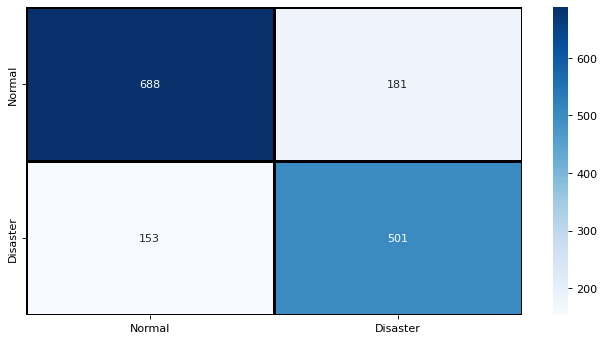

In [61]:
pred_pass2 = pass_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_pass2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass2)
prec = precision_score(y_test, pred_pass2)
rec = recall_score(y_test, pred_pass2)
f1 = f1_score(y_test, pred_pass2)

results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Bigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
combined_results = pd.concat([model_results, results], ignore_index=True)
combined_results

# TF-IDF Vectorizer - Tri Gram

In [62]:
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

# Multinomial Naive Bayes - Tri Gram

In [63]:

mnb_tf3 = MultinomialNB()
mnb_tf3.fit(tfidf_train_3, y_train)

MultinomialNB()

# 10-fold cross validation

In [64]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_mnb3 = cross_val_score(estimator = mnb_tf, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_mnb3.mean()

0.7845648604269294

# Model Prediction

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800
1,Passive Aggressive Classifier - TFIDF-Bigram,0.780696,0.734604,0.766055,0.920598,0.750000
2,Multinomial Naive Bayes - TFIDF-Trigram,0.798424,0.866808,0.626911,0.920598,0.727595


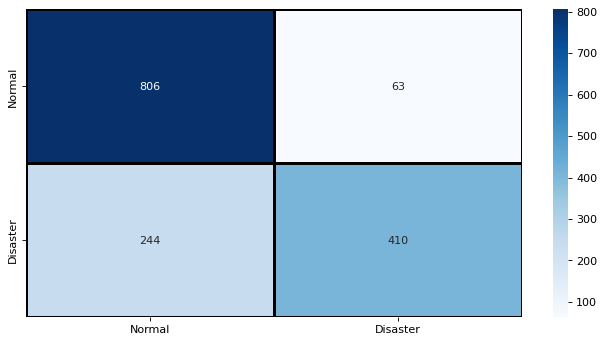

In [65]:
pred_mnb3 = mnb_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_mnb3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_mnb3)
prec = precision_score(y_test, pred_mnb3)
rec = recall_score(y_test, pred_mnb3)
f1 = f1_score(y_test, pred_mnb3)

mod_results =pd.DataFrame([['Multinomial Naive Bayes - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
combined_results2 = pd.concat([combined_results, mod_results], ignore_index=True)
combined_results2

# Passive Aggressive Classifier - Tri Gram

In [66]:
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

## cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_pass3 = cross_val_score(estimator = pass_tf3, X = tfidf_train_3, y = y_train, cv = kfold,scoring=scoring)
acc_pass3.mean()

0.789655172413793

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Multinomial Naive Bayes - TFIDF-Bigram,0.800394,0.858607,0.640673,0.920598,0.733800
1,Passive Aggressive Classifier - TFIDF-Bigram,0.780696,0.734604,0.766055,0.920598,0.750000
2,Multinomial Naive Bayes - TFIDF-Trigram,0.798424,0.866808,0.626911,0.920598,0.727595
3,Passive Aggressive Classifier - TFIDF-Trigram,0.779383,0.727143,0.778287,0.920598,0.751846


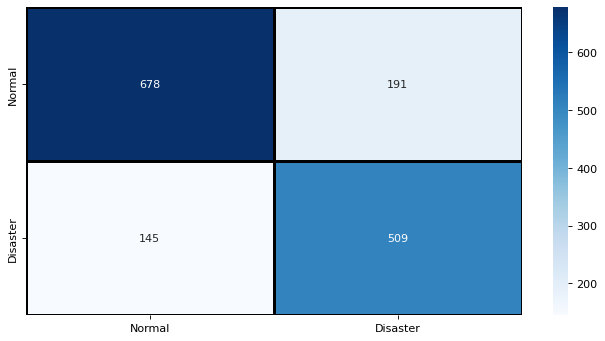

In [67]:
pred_pass3 = pass_tf3.predict(tfidf_test_3)
CM=confusion_matrix(y_test,pred_pass3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

acc = accuracy_score(y_test, pred_pass3)
prec = precision_score(y_test, pred_pass3)
rec = recall_score(y_test, pred_pass3)
f1 = f1_score(y_test, pred_pass3)

mod1_results =pd.DataFrame([['Passive Aggressive Classifier - TFIDF-Trigram',acc, prec,rec,specificity, f1]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])
combined_results3 = pd.concat([combined_results2, mod1_results], ignore_index=True)
combined_results3

# Most Informative Features

In [68]:
def most_informative_features_for_binary_classification(vectorizer, model, n=10):
   
    # Get feature names from TfidfVectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Get log probabilities from the model
    # `feature_log_prob_` contains the log probabilities of each feature for each class
    log_probabilities = model.feature_log_prob_
    
    # Since this is binary classification, there are two classes
    # `feature_log_prob_` is a 2D array with shape (2, num_features)
    
    # For each class (0 and 1), find the top n most informative features
    for class_index, class_label in enumerate(model.classes_):
        # Get log probabilities for the class
        class_log_probabilities = log_probabilities[class_index]
        
        # Get indices of the top n most informative features (highest log probabilities)
        top_n_indices = np.argsort(class_log_probabilities)[-n:]
        
        # Get the feature names and log probabilities for the top n features
        top_n_features = [(feature_names[i], class_log_probabilities[i]) for i in top_n_indices]
        
        # Sort features and log probabilities in descending order
        top_n_features_sorted = sorted(top_n_features, key=lambda x: x[1], reverse=True)
        
        # Display the top n features for the current class
        print(f"Top {n} most informative features for class '{class_label}':")
        for feature, log_prob in top_n_features_sorted:
            print(f"Feature: {feature}, Log probability: {log_prob}")
        print()  # Print a newline for better readability

most_informative_features_for_binary_classification(tfidf_vectorizer, mnb_tf, n=10)


Top 10 most informative features for class '0':
Feature: http, Log probability: -6.826734552404331
Feature: like, Log probability: -7.910442661433537
Feature: amp, Log probability: -8.214027822384562
Feature: new, Log probability: -8.426046541875504
Feature: body, Log probability: -8.584643504237324
Feature: day, Log probability: -8.589601815631259
Feature: love, Log probability: -8.593654910986235
Feature: time, Log probability: -8.61807923472973
Feature: got, Log probability: -8.627943900543999
Feature: let, Log probability: -8.629225898012553

Top 10 most informative features for class '1':
Feature: http, Log probability: -6.656035908079976
Feature: news, Log probability: -8.38719416064673
Feature: california, Log probability: -8.464670651819924
Feature: family, Log probability: -8.492613990518155
Feature: disaster, Log probability: -8.535473666344778
Feature: suicide, Log probability: -8.549708385580615
Feature: train, Log probability: -8.611845313922052
Feature: building, Log prob

# Sample prediction

In [69]:
sentences = [
  "An intense hurricane has made landfall, causing widespread flooding and destruction in coastal areas. Stay safe and evacuate if you can!",
    "Heard about #earthquake is different cities, stay safe everyone.","weather is very good to play cricket",
    "@RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated?"
  ]
tfidf_trigram = tfidf_vectorizer_3.transform(sentences)


predictions = pass_tf3.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("text:", text, "\nClass:", target)
        print()
    else:
        target="Normal Tweet"
        print("text:", text, "\nClass:", target)
        print()

text: An intense hurricane has made landfall, causing widespread flooding and destruction in coastal areas. Stay safe and evacuate if you can! 
Class: Disaster Tweet

text: Heard about #earthquake is different cities, stay safe everyone. 
Class: Disaster Tweet

text: weather is very good to play cricket 
Class: Normal Tweet

text: @RosieGray Now in all sincerety do you think the UN would move to Israel if there was a fraction of a chance of being annihilated? 
Class: Normal Tweet



In [70]:
# Save the model
import joblib
joblib.dump(pass_tf3, 'tfidf_tweet.joblib')


['tfidf_tweet.joblib']

In [71]:
import joblib
joblib.dump(tfidf_vectorizer_3, 'vectorizer.joblib')

['vectorizer.joblib']

In [72]:
import pickle
pickle.dump(pass_tf3, open('tfidf_tweet.pkl', 'wb'))
pickle.dump(tfidf_vectorizer_3, open('vectorizer.pkl', 'wb'))